In [2]:
import numpy as np
import pandas as pd

## Get the Data

In [3]:
movies_df = pd.read_csv('movies.csv',usecols=['movieId','title'],dtype={'movieId': 'int32', 'title': 'str'})
rating_df=pd.read_csv('ratings.csv',usecols=['userId', 'movieId', 'rating'],
    dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [4]:
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


Now let's get the movie titles:

In [5]:
rating_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


We can merge them together:

In [6]:
df = pd.merge(rating_df,movies_df,on='movieId')
df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [7]:
combine_movie_rating = df.dropna(axis = 0, subset = ['title'])
movie_ratingCount = (combine_movie_rating.
     groupby(by = ['title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['title', 'totalRatingCount']]
    )
movie_ratingCount.head()


,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [8]:
rating_with_totalRatingCount = combine_movie_rating.merge(movie_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215


In [9]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(movie_ratingCount['totalRatingCount'].describe())

count   9719.000
mean      10.375
std       22.406
min        1.000
25%        1.000
50%        3.000
75%        9.000
max      329.000
Name: totalRatingCount, dtype: float64


In [10]:
popularity_threshold = 50
rating_popular_movie= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.000,Toy Story (1995),215
1,5,1,4.000,Toy Story (1995),215
2,7,1,4.500,Toy Story (1995),215
3,15,1,2.500,Toy Story (1995),215
4,17,1,4.500,Toy Story (1995),215


In [11]:
rating_popular_movie.shape

(41362, 5)

# EDA

Let's explore the data a bit and get a look at some of the best rated movies.

## Visualization Imports

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [13]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                          5.000
Winter in Prostokvashino (1984)                 5.000
My Love (2006)                                  5.000
Sorority House Massacre II (1990)               5.000
Winnie the Pooh and the Day of Concern (1972)   5.000
Name: rating, dtype: float32

In [14]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [15]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.000
'Hellboy': The Seeds of Creation (2004),4.000
'Round Midnight (1986),3.500
'Salem's Lot (2004),5.000
'Til There Was You (1997),4.000


In [16]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'71 (2014),4.000,1
'Hellboy': The Seeds of Creation (2004),4.000,1
'Round Midnight (1986),3.500,2
'Salem's Lot (2004),5.000,1
'Til There Was You (1997),4.000,2


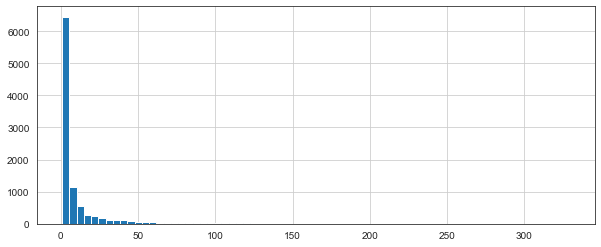

In [17]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

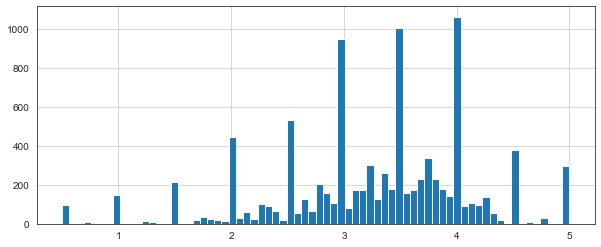

In [18]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)


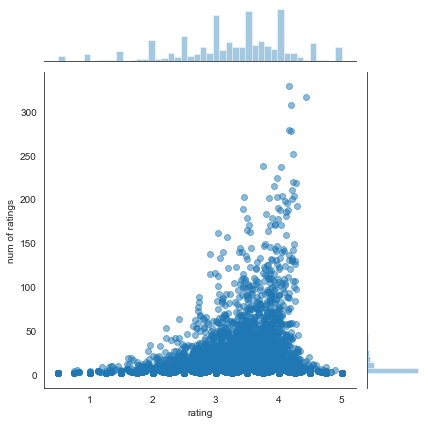

In [19]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

## Recommending Similar Movies

In [20]:
moviemat=rating_popular_movie.pivot_table(index='userId',columns='title',values='rating').fillna(0)
moviemat.head()

title,10 Things I Hate About You (1999),12 Angry Men (1957),2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),"40-Year-Old Virgin, The (2005)",A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),...,Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)","Wolf of Wall Street, The (2013)",X-Men (2000),X-Men: The Last Stand (2006),X2: X-Men United (2003),You've Got Mail (1998),Young Frankenstein (1974),Zombieland (2009),Zoolander (2001)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,...,5.000,5.000,0.000,5.000,0.000,0.000,0.000,5.000,0.000,0.000
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.500,0.000,0.000,0.000
4,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,4.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:

In [21]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),4.164,329
"Shawshank Redemption, The (1994)",4.429,317
Pulp Fiction (1994),4.197,307
"Silence of the Lambs, The (1991)",4.161,279
"Matrix, The (1999)",4.192,278
Star Wars: Episode IV - A New Hope (1977),4.231,251
Jurassic Park (1993),3.750,238
Braveheart (1995),4.032,237
Terminator 2: Judgment Day (1991),3.971,224


Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.

In [22]:
ratings.head(30)

,rating,num of ratings
title,,
'71 (2014),4.000,1
'Hellboy': The Seeds of Creation (2004),4.000,1
'Round Midnight (1986),3.500,2
'Salem's Lot (2004),5.000,1
'Til There Was You (1997),4.000,2
'Tis the Season for Love (2015),1.500,1
"'burbs, The (1989)",3.176,17
'night Mother (1986),3.000,1
(500) Days of Summer (2009),3.667,42


Now let's grab the user ratings for those two movies:

In [23]:
Forest_gump_user_ratings = moviemat['Forrest Gump (1994)']
Crimson_Tide_user_ratings = moviemat['Crimson Tide (1995)']
Forest_gump_user_ratings.head(10)

userId
1    4.000
2    0.000
3    0.000
4    0.000
5    0.000
6    5.000
7    5.000
8    3.000
9    0.000
10   3.500
Name: Forrest Gump (1994), dtype: float32

We can then use corrwith() method to get correlations between two pandas series:

In [24]:
similar_to_Forest_gump = moviemat.corrwith(Forest_gump_user_ratings)
similar_to_Crimson_Tide = moviemat.corrwith(Crimson_Tide_user_ratings)

In [25]:
corr_Forest_gump = pd.DataFrame(similar_to_Forest_gump,columns=['Correlation'])
corr_Forest_gump.dropna(inplace=True)
corr_Forest_gump.head()

,Correlation
title,
10 Things I Hate About You (1999),0.111
12 Angry Men (1957),0.107
2001: A Space Odyssey (1968),0.181
28 Days Later (2002),0.135
300 (2007),0.196


In [26]:
corr_Forest_gump.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Forrest Gump (1994),1.000
Jurassic Park (1993),0.451
Mrs. Doubtfire (1993),0.439
"Shawshank Redemption, The (1994)",0.407
Pretty Woman (1990),0.388
Apollo 13 (1995),0.388
Braveheart (1995),0.371
Pulp Fiction (1994),0.370
"Lion King, The (1994)",0.356


In [27]:
corr_Forest_gump = corr_Forest_gump.join(ratings['num of ratings'])
corr_Forest_gump.head()

,Correlation,num of ratings
title,,
10 Things I Hate About You (1999),0.111,54
12 Angry Men (1957),0.107,57
2001: A Space Odyssey (1968),0.181,109
28 Days Later (2002),0.135,58
300 (2007),0.196,80


In [28]:
corr_Forest_gump[corr_Forest_gump['num of ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
title,,
Forrest Gump (1994),1.000,329
Jurassic Park (1993),0.451,238
Mrs. Doubtfire (1993),0.439,144
"Shawshank Redemption, The (1994)",0.407,317
Pretty Woman (1990),0.388,135
Apollo 13 (1995),0.388,201
Braveheart (1995),0.371,237
Pulp Fiction (1994),0.370,307
"Lion King, The (1994)",0.356,172


In [29]:
corr_Crimson_Tide = pd.DataFrame(similar_to_Crimson_Tide,columns=['Correlation'])
corr_Crimson_Tide.dropna(inplace=True)
corr_Crimson_Tide = corr_Crimson_Tide.join(ratings['num of ratings'])
corr_Crimson_Tide[corr_Crimson_Tide['num of ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
title,,
Crimson Tide (1995),1.000,103
Clear and Present Danger (1994),0.636,110
Cliffhanger (1993),0.568,101
"Firm, The (1993)",0.541,101
Outbreak (1995),0.540,101
"Fugitive, The (1993)",0.519,190
True Lies (1994),0.502,178
Die Hard: With a Vengeance (1995),0.477,144
Dances with Wolves (1990),0.472,164
